# Make the imports
set the importations 

In [1]:
## imports
import warnings 
warnings.filterwarnings('ignore')

import skillsnetwork
import pandas as pd
import numpy as np 

import seaborn as sns 
import matplotlib.pylab as plt
from sklearn.preprocessing import LabelEncoder

# Load the data

Read the data and show the head

In [2]:
## Load the data of rendimientoAcademico
URL = 'https://upcedupe-my.sharepoint.com/:x:/g/personal/e201210223_upc_edu_pe/ETKYqjlGxDtAv7JIexnP0VkBOnvsLBR9ip6KNaVQsvUflg?e=Z3QbqW'

await skillsnetwork.download_dataset(URL)
academic = pd.read_csv('rendimientoAcademico.csv', sep=';')

academic.head(5)

Saved as 'ETKYqjlGxDtAv7JIexnP0VkBOnvsLBR9ip6KNaVQsvUflg'


,gender,age,civilStatus,childrens,district,health,closeFriends,work,workHoursWeek,familyMembers,...,universitySelectionReazon,minToTravel,weekStudyTime,failCourses,AsistancePercentage,midterExam,finalExam,practiceGrade,FinalGrade,StudentPerformance
0,Hombre,19,Sin Pareja,0,Lima Norte,Regular,3,No,4,3,...,Cercania,15.0,2.0,1,90,14,12,13.0,13.000000,Low
1,Hombre,22,Sin Pareja,0,Lima Norte,Bien,2,No,0,3,...,Preferida,30.0,8.0,0,100,16,17,16.0,16.333333,Medium
2,Mujer,24,Sin Pareja,0,Callao,Mal,5,Si,48,4,...,Preferida,45.0,0.0,0,80,15,15,16.0,15.333333,Medium
3,Hombre,19,Sin Pareja,0,Lima Cercado,Bien,30,Si,40,25,...,Cercania,20.0,3.0,0,100,15,15,14.0,14.666667,Medium
4,Hombre,20,Sin Pareja,0,Lima Norte,Bien,4,Si,25,5,...,Preferida,50.0,5.0,2,100,14,14,14.0,14.000000,Medium


# Cleanning and feature ingeeniering
lets see more info about the dataset

In [3]:
academic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327 entries, 0 to 326
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   gender                     327 non-null    object 
 1   age                        327 non-null    int64  
 2   civilStatus                327 non-null    object 
 3   childrens                  327 non-null    int64  
 4   district                   327 non-null    object 
 5   health                     327 non-null    object 
 6   closeFriends               327 non-null    int64  
 7   work                       327 non-null    object 
 8   workHoursWeek              327 non-null    int64  
 9   familyMembers              327 non-null    int64  
 10  familiarIncome             327 non-null    object 
 11  fatherStudy                327 non-null    object 
 12  motherStudy                327 non-null    object 
 13  university                 327 non-null    object 

the dataset has severals columns, some of then are objects so they shoud be transform in categorial ones.
the next code is to see if there are null values apparently by the info above there is not but lets check again.

Text(0.5, 1.0, 'Total Missing Values')

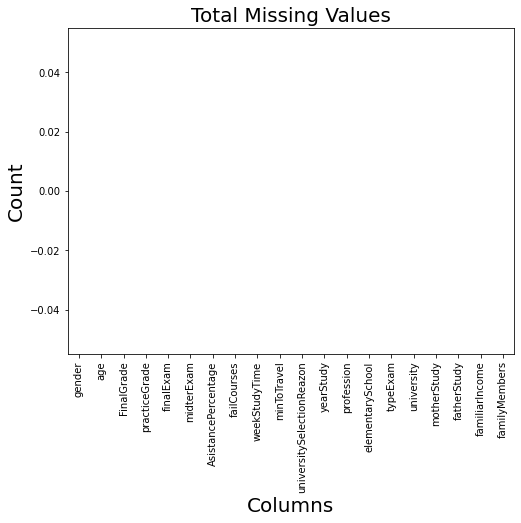

In [4]:
total = academic.isnull().sum().sort_values(ascending=False)
total_select = total.head(20)
total_select.plot(kind="bar", figsize = (8,6), fontsize = 10)

plt.xlabel("Columns", fontsize = 20)
plt.ylabel("Count", fontsize = 20)
plt.title("Total Missing Values", fontsize = 20)

The plot shows that there is no missing values to validate

many columns are strings needs to be convert into categorical numerical values

In [5]:
df_uniques = pd.DataFrame([[i, len(academic[i].unique())] for i in academic.columns], columns=['Variable', 'Unique Values']).set_index('Variable')
df_uniques

,Unique Values
Variable,
gender,2
age,39
civilStatus,2
childrens,4
district,4
health,3
closeFriends,19
work,2
workHoursWeek,40


In [6]:
binary_variables = list(df_uniques[df_uniques['Unique Values'] == 2].index)
binary_variables

['gender',
 'civilStatus',
 'work',
 'fatherStudy',
 'motherStudy',
 'university',
 'typeExam',
 'elementarySchool']

In [7]:
[[i, list(academic[i].unique())] for i in binary_variables]

[['gender', ['Hombre', 'Mujer']],
 ['civilStatus', ['Sin Pareja', 'Con Pareja']],
 ['work', ['No', 'Si']],
 ['fatherStudy', ['Profesional', 'No Profesional']],
 ['motherStudy', ['Profesional', 'No Profesional']],
 ['university', ['Particular', 'Nacional']],
 ['typeExam', ['Examen ordinario', 'Examen Especial']],
 ['elementarySchool', ['Particular', 'Nacional']]]

In [8]:
categorical_variables = list(df_uniques[(6 >= df_uniques['Unique Values']) & (df_uniques['Unique Values'] > 2)].index)
categorical_variables

['childrens',
 'district',
 'health',
 'familiarIncome',
 'profession',
 'yearStudy',
 'universitySelectionReazon',
 'StudentPerformance']

In [9]:
[[i, list(academic[i].unique())] for i in categorical_variables]

[['childrens', [0, 1, 2, 3]],
 ['district', ['Lima Norte', 'Callao', 'Lima Cercado', 'Lima Sur']],
 ['health', ['Regular', 'Bien', 'Mal']],
 ['familiarIncome', ['Medio', 'Bajo', 'Alto']],
 ['profession', ['Ingenieria', 'Letras', 'Administracion', 'ADMINISTRACION']],
 ['yearStudy', [2, 3, 5, 4, 1]],
 ['universitySelectionReazon',
  ['Cercania', 'Preferida', 'Costos', 'Beneficios']],
 ['StudentPerformance', ['Low', 'Medium', 'High']]]

In [10]:
ordinal_variables = ['district', 'health','familiarIncome','profession','universitySelectionReazon','StudentPerformance']

In [11]:
numeric_variables = list(set(academic.columns) - set(ordinal_variables)  - set(binary_variables))
numeric_variables

['weekStudyTime',
 'FinalGrade',
 'closeFriends',
 'minToTravel',
 'midterExam',
 'practiceGrade',
 'childrens',
 'familyMembers',
 'yearStudy',
 'AsistancePercentage',
 'workHoursWeek',
 'age',
 'finalExam',
 'failCourses']

array([[<AxesSubplot:title={'center':'weekStudyTime'}>,
        <AxesSubplot:title={'center':'FinalGrade'}>,
        <AxesSubplot:title={'center':'closeFriends'}>,
        <AxesSubplot:title={'center':'minToTravel'}>],
       [<AxesSubplot:title={'center':'midterExam'}>,
        <AxesSubplot:title={'center':'practiceGrade'}>,
        <AxesSubplot:title={'center':'childrens'}>,
        <AxesSubplot:title={'center':'familyMembers'}>],
       [<AxesSubplot:title={'center':'yearStudy'}>,
        <AxesSubplot:title={'center':'AsistancePercentage'}>,
        <AxesSubplot:title={'center':'workHoursWeek'}>,
        <AxesSubplot:title={'center':'age'}>],
       [<AxesSubplot:title={'center':'finalExam'}>,
        <AxesSubplot:title={'center':'failCourses'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

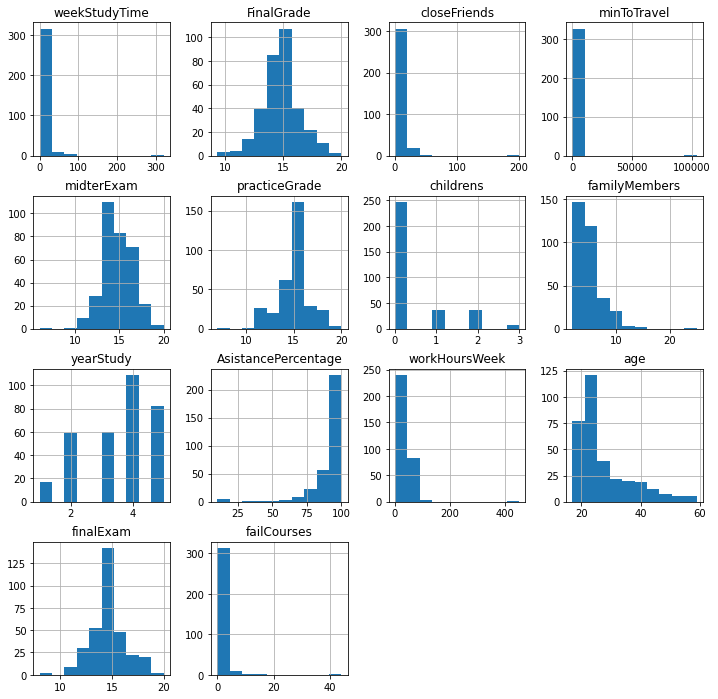

In [12]:
academic[numeric_variables].hist(figsize=(12, 12))


In [13]:
string_variables = list(set(academic.columns) - set(numeric_variables))
string_variables

['elementarySchool',
 'district',
 'civilStatus',
 'familiarIncome',
 'work',
 'typeExam',
 'motherStudy',
 'StudentPerformance',
 'profession',
 'universitySelectionReazon',
 'health',
 'fatherStudy',
 'gender',
 'university']

In [14]:
[[i, list(academic[i].unique())] for i in string_variables]

[['elementarySchool', ['Particular', 'Nacional']],
 ['district', ['Lima Norte', 'Callao', 'Lima Cercado', 'Lima Sur']],
 ['civilStatus', ['Sin Pareja', 'Con Pareja']],
 ['familiarIncome', ['Medio', 'Bajo', 'Alto']],
 ['work', ['No', 'Si']],
 ['typeExam', ['Examen ordinario', 'Examen Especial']],
 ['motherStudy', ['Profesional', 'No Profesional']],
 ['StudentPerformance', ['Low', 'Medium', 'High']],
 ['profession', ['Ingenieria', 'Letras', 'Administracion', 'ADMINISTRACION']],
 ['universitySelectionReazon',
  ['Cercania', 'Preferida', 'Costos', 'Beneficios']],
 ['health', ['Regular', 'Bien', 'Mal']],
 ['fatherStudy', ['Profesional', 'No Profesional']],
 ['gender', ['Hombre', 'Mujer']],
 ['university', ['Particular', 'Nacional']]]

In [15]:
le = LabelEncoder()
for column in string_variables:
    academic[column] = le.fit_transform(academic[column])

In [16]:
academic

,gender,age,civilStatus,childrens,district,health,closeFriends,work,workHoursWeek,familyMembers,...,universitySelectionReazon,minToTravel,weekStudyTime,failCourses,AsistancePercentage,midterExam,finalExam,practiceGrade,FinalGrade,StudentPerformance
0,0,19,1,0,2,2,3,0,4,3,...,1,15.0,2.0,1,90,14,12,13.0,13.000000,1
1,0,22,1,0,2,0,2,0,0,3,...,3,30.0,8.0,0,100,16,17,16.0,16.333333,2
2,1,24,1,0,0,1,5,1,48,4,...,3,45.0,0.0,0,80,15,15,16.0,15.333333,2
3,0,19,1,0,1,0,30,1,40,25,...,1,20.0,3.0,0,100,15,15,14.0,14.666667,2
4,0,20,1,0,2,0,4,1,25,5,...,3,50.0,5.0,2,100,14,14,14.0,14.000000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,0,32,1,0,3,0,2,1,42,3,...,3,120.0,4.0,0,98,15,16,15.0,15.333333,2
323,0,24,1,0,1,0,2,1,52,6,...,3,90.0,80.0,0,100,15,14,16.0,15.000000,2
324,0,29,1,0,2,0,25,1,48,5,...,3,25.0,5.0,0,90,17,18,17.0,17.333333,0
325,0,23,1,0,3,0,2,1,24,2,...,3,180.0,3.0,0,90,15,18,16.0,16.333333,2


In [17]:
academic.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,327.0,0.207951,0.406464,0.000000,0.000000,0.000000,0.000000,1.0
age,327.0,27.562691,8.768401,17.000000,22.000000,24.000000,31.000000,59.0
civilStatus,327.0,0.666667,0.472127,0.000000,0.000000,1.000000,1.000000,1.0
childrens,327.0,0.397554,0.768071,0.000000,0.000000,0.000000,0.000000,3.0
district,327.0,1.822630,1.029790,0.000000,1.000000,2.000000,3.000000,3.0
health,327.0,0.464832,0.831411,0.000000,0.000000,0.000000,0.000000,2.0
closeFriends,327.0,6.770642,12.504453,0.000000,3.000000,4.000000,7.000000,200.0
work,327.0,0.675841,0.468777,0.000000,0.000000,1.000000,1.000000,1.0
workHoursWeek,327.0,27.073394,32.663005,0.000000,0.000000,30.000000,48.000000,453.0
familyMembers,327.0,5.152905,2.396543,2.000000,4.000000,5.000000,6.000000,25.0


Lets see the outliners

<AxesSubplot:xlabel='weekStudyTime'>

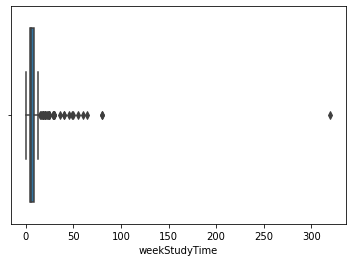

In [18]:
sns.boxplot(x=academic['weekStudyTime'])

In [19]:
academic.sort_values(by = 'weekStudyTime', ascending = False)[:2]

,gender,age,civilStatus,childrens,district,health,closeFriends,work,workHoursWeek,familyMembers,...,universitySelectionReazon,minToTravel,weekStudyTime,failCourses,AsistancePercentage,midterExam,finalExam,practiceGrade,FinalGrade,StudentPerformance
225,0,29,1,0,2,0,5,1,40,4,...,3,100.0,320.0,0,100,14,14,15.0,14.333333,2
323,0,24,1,0,1,0,2,1,52,6,...,3,90.0,80.0,0,100,15,14,16.0,15.000000,2


<AxesSubplot:xlabel='minToTravel'>

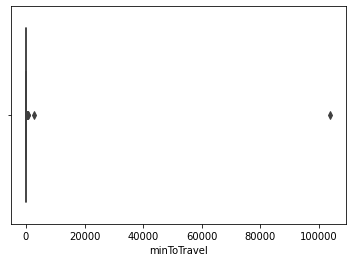

In [20]:
sns.boxplot(x=academic['minToTravel'])

In [21]:
academic.sort_values(by = 'minToTravel', ascending = False)[:2]

,gender,age,civilStatus,childrens,district,health,closeFriends,work,workHoursWeek,familyMembers,...,universitySelectionReazon,minToTravel,weekStudyTime,failCourses,AsistancePercentage,midterExam,finalExam,practiceGrade,FinalGrade,StudentPerformance
310,1,22,1,0,3,0,5,1,7,6,...,3,103845.0,8.0,4,90,13,13,15.0,13.666667,2
200,0,50,0,1,1,0,5,1,8,3,...,3,2880.0,3.0,0,100,15,15,18.0,16.000000,2


<AxesSubplot:xlabel='familyMembers'>

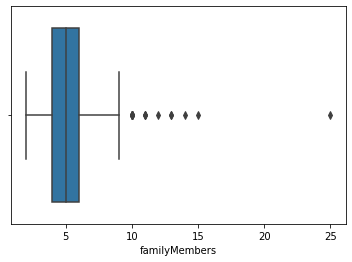

In [22]:
sns.boxplot(x=academic['familyMembers']) 

In [23]:
academic.sort_values(by = 'familyMembers', ascending = False)[:2]


,gender,age,civilStatus,childrens,district,health,closeFriends,work,workHoursWeek,familyMembers,...,universitySelectionReazon,minToTravel,weekStudyTime,failCourses,AsistancePercentage,midterExam,finalExam,practiceGrade,FinalGrade,StudentPerformance
3,0,19,1,0,1,0,30,1,40,25,...,1,20.0,3.0,0,100,15,15,14.0,14.666667,2
143,1,18,1,0,1,0,5,0,0,15,...,3,35.0,6.0,0,100,12,14,15.0,13.666667,2


<AxesSubplot:xlabel='workHoursWeek'>

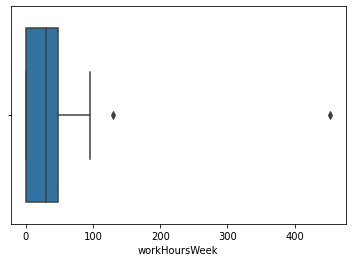

In [24]:

sns.boxplot(x=academic['workHoursWeek']) 

In [25]:
academic.sort_values(by = 'workHoursWeek', ascending = False)[:2]

,gender,age,civilStatus,childrens,district,health,closeFriends,work,workHoursWeek,familyMembers,...,universitySelectionReazon,minToTravel,weekStudyTime,failCourses,AsistancePercentage,midterExam,finalExam,practiceGrade,FinalGrade,StudentPerformance
31,0,25,1,0,0,0,7,1,453,3,...,1,45.0,24.0,16,100,17,16,16.0,16.333333,2
132,0,25,1,0,2,0,0,1,130,5,...,3,120.0,64.0,0,100,13,12,13.0,12.666667,1


<AxesSubplot:xlabel='closeFriends'>

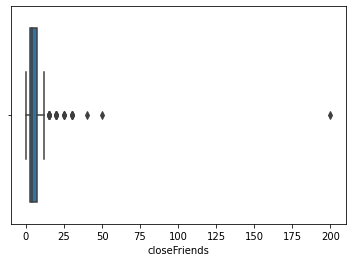

In [26]:

sns.boxplot(x=academic['closeFriends']) 

In [27]:
academic.sort_values(by = 'closeFriends', ascending = False)[:2]

,gender,age,civilStatus,childrens,district,health,closeFriends,work,workHoursWeek,familyMembers,...,universitySelectionReazon,minToTravel,weekStudyTime,failCourses,AsistancePercentage,midterExam,finalExam,practiceGrade,FinalGrade,StudentPerformance
38,0,42,0,2,1,0,200,1,48,4,...,3,60.0,4.0,1,14,14,14,14.0,14.0,2
256,0,24,1,0,2,0,50,1,40,4,...,3,70.0,2.0,0,85,11,12,13.0,12.0,1


In [28]:
academic.drop(academic.index[[3,31,38,132,143,200,225,256,310,323]],inplace=True) 

<AxesSubplot:xlabel='weekStudyTime'>

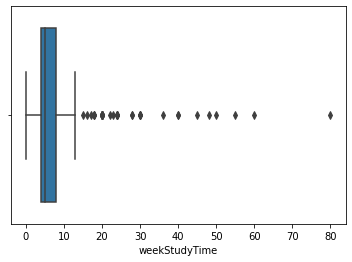

In [29]:
sns.boxplot(x=academic['weekStudyTime'])

<AxesSubplot:xlabel='minToTravel'>

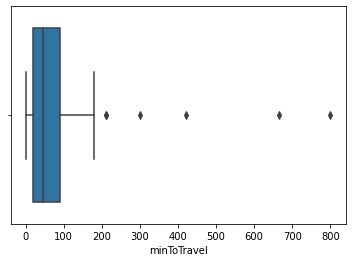

In [30]:
sns.boxplot(x=academic['minToTravel'])

<AxesSubplot:xlabel='familyMembers'>

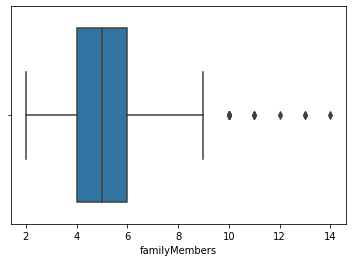

In [31]:
sns.boxplot(x=academic['familyMembers']) 

<AxesSubplot:xlabel='workHoursWeek'>

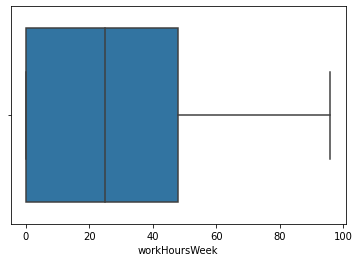

In [32]:
sns.boxplot(x=academic['workHoursWeek']) 

<AxesSubplot:xlabel='closeFriends'>

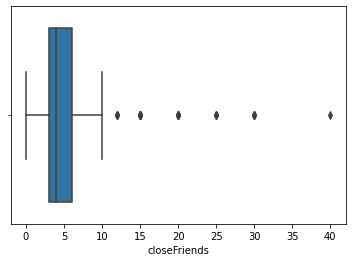

In [33]:
sns.boxplot(x=academic['closeFriends']) 

Guardamos el archivo procesado con los datos ya convertidos a numericos para poder procesarlos

In [34]:
outputfile = 'studentPerformanceProcesed.csv'
academic.to_csv(outputfile, index=False)


# set the data for the Predictions

<AxesSubplot:xlabel='StudentPerformance'>

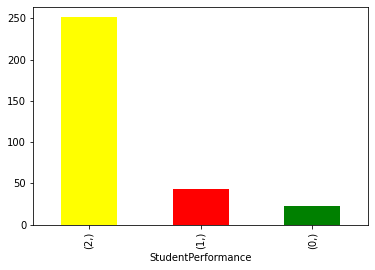

In [35]:
academic.iloc[:, -1:].value_counts().plot.bar(color=['yellow', 'red', 'green'])

Our data set is inbalance take it into account for the case  
for now the X and Y data is created

In [36]:
X_raw = academic.iloc[:, :-1]
y_raw = academic.iloc[:, -1:]

In [37]:
X_raw

,gender,age,civilStatus,childrens,district,health,closeFriends,work,workHoursWeek,familyMembers,...,yearStudy,universitySelectionReazon,minToTravel,weekStudyTime,failCourses,AsistancePercentage,midterExam,finalExam,practiceGrade,FinalGrade
0,0,19,1,0,2,2,3,0,4,3,...,2,1,15.0,2.0,1,90,14,12,13.0,13.000000
1,0,22,1,0,2,0,2,0,0,3,...,3,3,30.0,8.0,0,100,16,17,16.0,16.333333
2,1,24,1,0,0,1,5,1,48,4,...,5,3,45.0,0.0,0,80,15,15,16.0,15.333333
4,0,20,1,0,2,0,4,1,25,5,...,5,3,50.0,5.0,2,100,14,14,14.0,14.000000
5,0,21,0,1,2,0,2,1,40,5,...,4,1,40.0,4.0,4,70,17,17,17.0,17.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321,0,33,0,1,0,2,0,1,48,3,...,3,2,80.0,5.0,2,80,14,12,14.0,13.333333
322,0,32,1,0,3,0,2,1,42,3,...,3,3,120.0,4.0,0,98,15,16,15.0,15.333333
324,0,29,1,0,2,0,25,1,48,5,...,3,3,25.0,5.0,0,90,17,18,17.0,17.333333
325,0,23,1,0,3,0,2,1,24,2,...,3,3,180.0,3.0,0,90,15,18,16.0,16.333333


In [38]:
y_raw

,StudentPerformance
0,1
1,2
2,2
4,2
5,2
...,...
321,2
322,2
324,0
325,2


# Logistic Regression

for logictic regression the data has to be scaler 

In [39]:
from sklearn.preprocessing import  MinMaxScaler
scaler = MinMaxScaler()
x=scaler.fit_transform(X_raw)
y=y_raw

print(f"The range of feature inputs are within {x.min()} to {x.max()}")

The range of feature inputs are within 0.0 to 1.0


Creando datos de entrenamiento y de prueba

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state = 123)

In [41]:
print(f"Training dataset shape, X_train: {X_train.shape}, y_train: {y_train.shape}")

Training dataset shape, X_train: (253, 27), y_train: (253, 1)


In [42]:
print(f"Testing dataset shape, X_test: {X_test.shape}, y_test: {y_test.shape}")

Testing dataset shape, X_test: (64, 27), y_test: (64, 1)


In [43]:
# L2 penalty to shrink coefficients without removing any features from the model
penalty= 'l2'
# Our classification problem is multinomial
multi_class = 'multinomial'
# Use lbfgs for L2 penalty and multinomial classes
solver = 'lbfgs'
# Max iteration = 1000
max_iter = 1000

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_recall_fscore_support, precision_score, recall_score

l2_model = LogisticRegression(random_state=123, penalty=penalty, multi_class=multi_class, solver=solver, max_iter=max_iter)

In [45]:
l2_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=123)

In [46]:
l2_preds = l2_model.predict(X_test)

In [47]:
def evaluate_metrics(yt, yp):
    results_pos = {}
    results_pos['accuracy'] = accuracy_score(yt, yp)
    precision, recall, f_beta, _ = precision_recall_fscore_support(yt, yp)
    results_pos['recall'] = recall
    results_pos['precision'] = precision
    results_pos['f1score'] = f_beta
    return results_pos

In [48]:
evaluate_metrics(y_test, l2_preds)

{'accuracy': 0.8125,
 'recall': array([0.        , 0.22222222, 0.98039216]),
 'precision': array([0.        , 1.        , 0.81967213]),
 'f1score': array([0.        , 0.36363636, 0.89285714])}

As we can see the acurracy si good 0.8 but the others metrics by clases is low specially in class 0 that is for the inbalance dataset, now we going to try we another model  to see if improve the range  

the next model is the knn 

In [52]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=2)
knn_model.fit(X_train, y_train.values.ravel())
preds = knn_model.predict(X_test)
evaluate_metrics(y_test, preds)

{'accuracy': 0.609375,
 'recall': array([0.        , 0.33333333, 0.70588235]),
 'precision': array([0.        , 0.27272727, 0.7826087 ]),
 'f1score': array([0.        , 0.3       , 0.74226804])}

the accurcy in this model is lower also the other metrics suffer the same inbalance problem

<AxesSubplot:xlabel='StudentPerformance'>

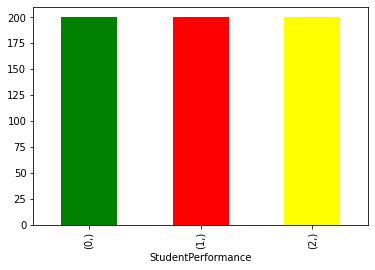

In [56]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
smote_sampler = SMOTE(random_state = 123)
X_smo, y_smo = smote_sampler.fit_resample(X_train, y_train)
y_smo.value_counts().plot.bar(color=['green', 'red','yellow'])

In [57]:
knn_model.fit(X_smo, y_smo.values.ravel())
preds = knn_model.predict(X_test)
evaluate_metrics(y_test, preds)

{'accuracy': 0.578125,
 'recall': array([0.5       , 0.44444444, 0.60784314]),
 'precision': array([0.2       , 0.25      , 0.81578947]),
 'f1score': array([0.28571429, 0.32      , 0.69662921])}

In [58]:
l2_model.fit(X_smo, y_smo)
l2_preds = l2_model.predict(X_test)
evaluate_metrics(y_test, l2_preds)

{'accuracy': 0.828125,
 'recall': array([0.5       , 0.88888889, 0.84313725]),
 'precision': array([0.33333333, 0.66666667, 0.93478261]),
 'f1score': array([0.4       , 0.76190476, 0.88659794])}